In [226]:
import sympy as sp
import math

In [170]:
x = sp.abc.symbols('x', real='True')
def f(x):
    return 3 * sp.cos(x) ** 2 - sp.sqrt(x)
a, b = 0, 3

In [163]:
f(x)

-sqrt(x) + 3*cos(x)**2

In [185]:
def Newton_method(f, x_0, epsilon=pow(0.1, 6)):
    x_n = -1    
    x_prev = x_0 + 2 * epsilon
    while x_n < 0:
        x_n = x_0
        while abs(x_n - x_prev) >= epsilon:
            if x_n < 0:
                break
            x_prev, x_n = x_n, x_n - (sp.diff(f, x).subs(x, x_n) / sp.diff(sp.diff(f, x), x).subs(x, x_n)).evalf()
    return x_n
    

In [213]:
def find_x_0(f, a, b, go_from_left):
    step = (b - a) / 1000
    order_of_the_derivative = 3
    point = a
    if not go_from_left:
        point = b
    x = sp.abc.symbols('x', real='True')
    number_of_positives = 0
    def get_n_derivative(f, n):
        result_f = f
        while n:
            result_f = sp.diff(result_f, x)
            n -= 1
        return result_f
    while  point <= b:
        result_f = get_n_derivative(f(x), 2)
        if (result_f.subs(x, point).is_finite and result_f.subs(x, point) > 0 and sp.diff(result_f, x).subs(x, point).is_finite and (number_of_positive := number_of_positive + 1)) or ((number_of_positive := 0) != 0):
            if number_of_positive > 100:
                return point
        if go_from_left:
            point += step
        else:
            point -= step
    raise Exception("Change 1000 in function find_x_0 to something else.")

In [214]:
go_from_left = True
x_0 = find_x_0(f, a, b, go_from_left)
x_0_alternative = find_x_0(f, a, b, not go_from_left)
print(Newton_method(f(x), x_0))
print(x_0_alternative )
print(Newton_method(f(x), x_0_alternative))

1.63613138418847
2.0609999999999644
1.63613138418847


In [232]:
# Поиск последовательности Фибоначчи
def fib(input_num):
    fib.arr = [1, 1]
    if input_num < len(fib.arr):
        return fib_arr[input_num - 1]
    n = int(input_num)
    pr, nx = fib.arr[-2], fib.arr[-1]
    for k in range(len(fib.arr) - 1, input_num):
        pr, nx = nx, nx + pr
        fib.arr.append(nx)
    return fib.arr[input_num-1]

def fibonacci(a, b, eps, N):
    a0 = a
    b0 = b
    k = 0
    y0 = a0+((fib(N-2)/fib(N))*(b0-a0))
    z0 = a0+((fib(N-1)/fib(N))*(b0-a0))
    while abs(b0 - a0) > eps:
        if func_task(y0) > func_task(z0):
            a0 = y0
            y0 = z0
            z0 = a0+((fib(N-k-2)/fib(N-k-1))*(b0-a0))
        else:
            b0=z0
            z0=y0
            y0=a0+((fib(N-k-3)/fib(N-k-1))*(b0-a0))
        if ++k > 10e5:
            break
    return (a0 + b0) / 2

In [239]:
class FibonacciSearch:
    def __init__(self):
        self.i = 0
        self.p = 0
        self.q = 0
        self.stop = False

    def get_fibonacci_number(self, k):
        first_number = 0
        second_number = 1
        n = 0
        while n < k:
            temp_number = second_number
            second_number = first_number + second_number
            first_number = temp_number
            n = n + 1
        return first_number

    def start_init(self, sequince):
        self.stop = False
        k = 0
        n = len(sequince)
        while (self.get_fibonacci_number(k+1) < len(sequince)):
            k = k+1
        m = self.get_fibonacci_number(k+1)-(n+1)
        self.i = self.get_fibonacci_number(k) - m
        self.p = self.get_fibonacci_number(k-1)
        self.q = self.get_fibonacci_number(k-2)

    def up_index(self):
        if self.p == 1:
            self.stop = True
        self.i = self.i + self.q
        self.p = self.p - self.q
        self.q = self.q - self.p

    def down_index(self):
        if self.q == 0:
            self.stop = True
        self.i = self.i-self.q
        temp = self.q
        self.q = self.p - self.q
        self.p = temp

    def search(self, sequince, element):
        self.start_init(sequince)
        result_index = -1
        while not self.stop:
            if self.i < 0:
                self.up_index()
            elif self.i >= len(sequince):
                self.down_index()
            elif sequince[self.i] == element:
                result_index = self.i
                break
            elif element < sequince[self.i]:
                self.down_index()
            elif element > sequince[self.i]:
                self.up_index()
        return result_index


sequince = [-2, 0, 3, 5, 7, 9, 11, 15, 18, 21]


fs = FibonacciSearch()

element = 7

print(fs.search(sequince, element))

4


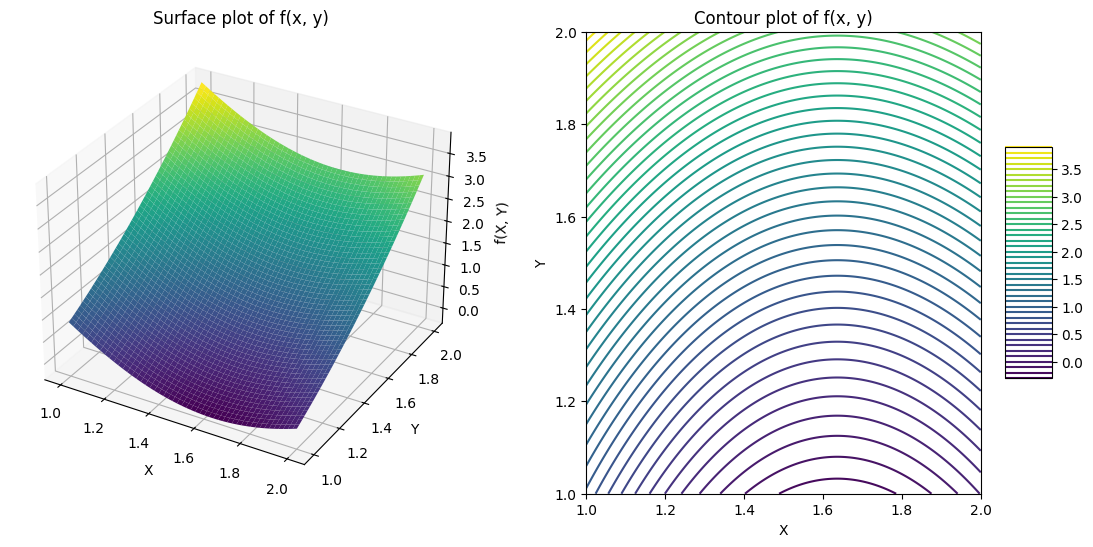

The optimal point is: [1.63613152 1.        ]
The optimal value is: -0.2663257169732942
Number of iterations: 5


In [238]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Определяем функцию f(x, y)
def f(xy):
    x, y = xy
    return 3 * np.cos(x)**2 - np.sqrt(x) + y**2

# Построение графика функции и поверхностей уровня
def plot_function_and_contours():
    x = np.linspace(1, 2, 400)
    y = np.linspace(1, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = 3 * np.cos(X)**2 - np.sqrt(X) + Y**2

    fig = plt.figure(figsize=(14, 6))
    
    # График поверхности
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X, Y)')
    ax1.set_title('Surface plot of f(x, y)')

    # Контурный график
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Contour plot of f(x, y)')
    fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)

    plt.show()

# Поиск минимума функции с заданной точностью
def find_minimum():
    # Начальная точка (по графику или другим соображениям)
    initial_guess = [1.5, 1.5]
    
    # Границы для переменных (x1, x2) и (y1, y2)
    bounds = [(1, 2), (1, 2)]
    
    result = minimize(f, initial_guess, bounds=bounds, tol=1e-6)
    
    return result.x, result.fun, result.nit

# Построение графиков
plot_function_and_contours()

# Поиск минимума
optimal_point, optimal_value, num_iterations = find_minimum()

print(f"The optimal point is: {optimal_point}")
print(f"The optimal value is: {optimal_value}")
print(f"Number of iterations: {num_iterations}")


In [1]:
# 9.2.6
def compute(f, a, b, epsilon):
    next_fib_num, cur_fib_num, prev_fib_num = 3, 2, 1
    number_of_iterations = 0
    while b - a > epsilon:
        delta = b - a
        alpha, beta = a + delta * prev_fib_num / next_fib_num, a + delta * cur_fib_num / next_fib_num
        if f(alpha) <= f(beta):
            a, b = a, beta
        else:
            a, b = alpha, b
        next_fib_num, cur_fib_num, prev_fib_num = next_fib_num + cur_fib_num, cur_fib_num + prev_fib_num, cur_fib_num
        number_of_iterations += 1
    return {"x_min": a, "number_of_iterations": number_of_iterations}


In [2]:
# Initial data
def f(t):
    return (t ** 2 - 3) / (t ** 3  + 2)
a, b, epsilon = -1, 4, 0.001
compute(f, a, b, epsilon)

a:  -1  b:  4
a:  -1  b:  2.3333333333333335
a:  -1  b:  1.0
a:  -1  b:  0.25
a:  -0.5192307692307692  b:  0.25
a:  -0.22619047619047616  b:  0.25
a:  -0.22619047619047616  b:  0.06792717086834738
a:  -0.11389101094983445  b:  0.06792717086834738
a:  -0.04443237969345039  b:  0.06792717086834738
a:  -0.04443237969345039  b:  0.025012064750994073
a:  -0.017906390184628255  b:  0.025012064750994073
a:  -0.017906390184628255  b:  0.008618808754363792
a:  -0.00777463386858703  b:  0.008618808754363792
a:  -0.00777463386858703  b:  0.002357078390784806
a:  -0.0039046623731475685  b:  0.002357078390784806
a:  -0.001512890649462873  b:  0.002357078390784806
a:  -0.001512890649462873  b:  0.0008788816538138552
a:  -0.0005993149463339645  b:  0.0008788816538138552


{'x_min': -0.0005993149463339645, 'number_of_iterations': 18}